In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge

In [3]:
df = pd.read_csv("ama_all_norm.csv")
df

,wxid,duration,Text,acc
0,"wxid_bk2z2t2ychyn22,wxid_9hpjr3hpy6th22,wxid_g...",0 days 00:01:11,👀\n👀\n你不乘噢\n👀\n👀\n之前在食堂偶遇的[捂脸]\n@25 匡院 苏涵瑜 我在你...,0.160428
1,"wxid_1vaqhsp5n5hs22,wxid_g7u000tjc91t22,wxid_r...",0 days 00:02:42,真的很无聊了\nxm社牛\n[表情包]\n[表情包]\n我说现在@25 匡院 苏涵瑜 \n[...,0.160428
2,"wxid_6djxj0s8zolf22,wxid_g7u000tjc91t22,wxid_m...",0 days 00:02:06,东西两个操场（）\n欢迎新人 @25 匡院 洪翌铭 \n[耶][耶][耶]\n大佬们好\n(...,0.133690
3,"wxid_mugbf0fhylqf22,wxid_g7u000tjc91t22,wxid_y...",0 days 00:11:22,cjdsa\n[表情包]\n好巧\n我也是六排。\n[表情包]\n天哪我才3分钟没看群感觉被...,0.160428
4,"wxid_g7u000tjc91t22,wxid_urt2jnq879zd29,voup_w...",0 days 00:14:21,[表情包]\n[旺柴][旺柴][旺柴]\n用screentogif，一个软件\n我用的是LI...,0.160428
...,...,...,...,...
2710,"wxid_2m6mvqnohoy032,wxid_g7u000tjc91t22,wxid_r...",0 days 00:09:07,第一次不是peace老师第一个点赞！\n[表情包]\n[表情包]\n@25 电子 谷和平 谷...,0.160428
2711,"wxid_m76swlb22bn132,wxid_g7u000tjc91t22,wxid_r...",0 days 00:03:21,刚在看文档，发现好多人没用模板\n[表情包]\n[表情包]\n[表情包]\n哪里有模版我看看...,0.347594
2712,"wxid_mugbf0fhylqf22,wxid_1jauivdztqzt22,wxid_g...",0 days 00:01:23,斯国一\n群里怎么每次进来都是你们几个\n[表情包]\n[表情包]\n哈？\n[图片]\n还...,0.160428
2713,"wxid_g7u000tjc91t22,wxid_mugbf0fhylqf22,wxid_m...",0 days 00:01:35,[表情包]\n[表情包]\n[表情包]\n心疼健小熊今天的早八人\n表情包全是水群水来的\n...,0.160428


In [4]:
X = df.iloc[:, 0:3]     # 前三列作为特征
y = df['acc']

In [5]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [7]:
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [8]:
y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R²: -0.03782256069351231
MSE: 0.026437651637913433


In [9]:
import joblib

# 保存训练好的模型
joblib.dump(model, 'acc_model.pkl')

# 如果用了编码器或特征转换器，也要一起保存
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

In [30]:
predictions = model.predict(X_test[1:100])
actual_values = y_test[1:100]

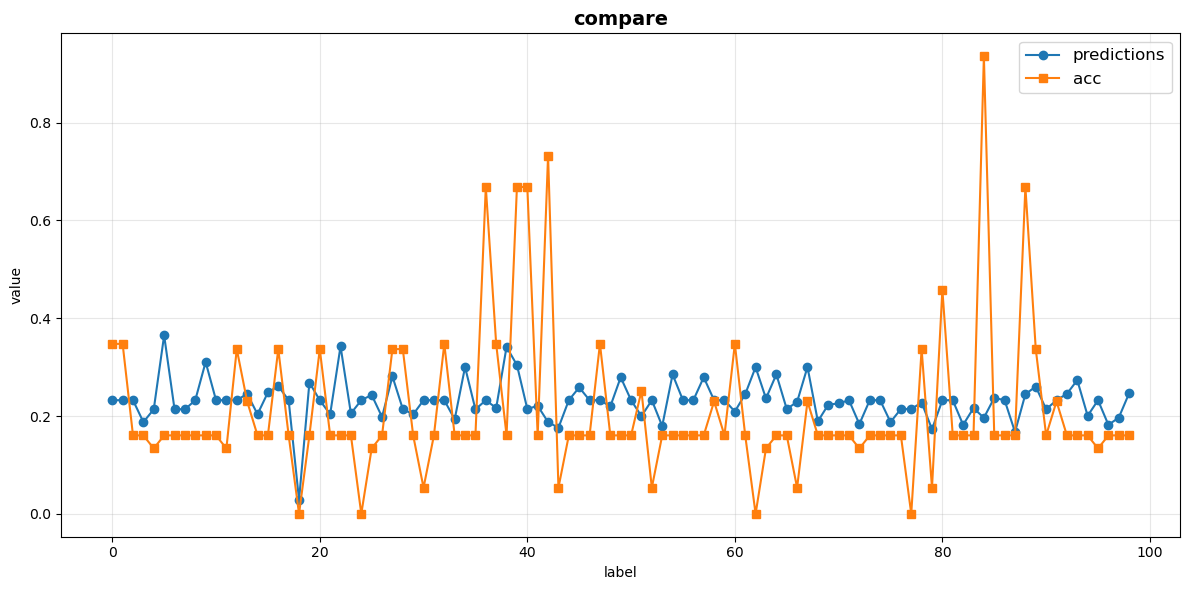

In [31]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12, 6))

# 创建样本索引
samples = np.arange(len(predictions))

# 绘制预测值和真实值
plt.plot(samples, predictions, 'o-', label='predictions' )
plt.plot(samples, actual_values, 's-', label="acc" )

# 添加图表元素
plt.xlabel('label')
plt.ylabel('value')
plt.title('compare',fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()